In [3]:
import os

# Print the current working directory
print(f"Working directory: {os.getcwd()}")

Working directory: /home/rbo/projects/python/CCDATSCL_COM221_PROJECT


In [4]:
import os

file_path = 'combined_player_data.csv'

if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does not exist.")

The file 'combined_player_data.csv' exists.


In [5]:
import pandas as pd

file_path = 'combined_player_data.csv'
df = pd.read_csv(file_path)

display(df.head(10))

,player_slot,team_number,team_slot,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,...,item_1_name,item_2_name,item_3_name,item_4_name,item_5_name,backpack_0_name,backpack_1_name,backpack_2_name,item_neutral_name,item_neutral2_name
0,2,0,2,81,63,112,151,154,114,36,...,Assault Cuirass,Armlet of Mordiggian,Sange and Yasha,Heart of Tarrasque,Magic Wand,Greater Healing Lotus,Quelling Blade,NaN,Duelist Gloves,Mystical
1,1,0,1,74,29,108,65,279,1802,0,...,Aghanim's Scepter,Hand of Midas,Ring of Tarrasque,Tiara of Selemene,NaN,NaN,NaN,NaN,Essence Ring,Vampiric
2,3,0,3,102,50,939,137,4205,30,36,...,Harpoon,Radiance,Great Healing Lotus,Gem of True Sight,Magic Wand,NaN,NaN,NaN,Serrated Shiv,Alert
3,131,1,3,105,259,180,102,108,232,235,...,Arcane Boots,Force Staff,Aghanim's Scepter,Aether Lens,Octarine Core,NaN,Observer Ward,NaN,Whisper of the Dread,Mystical
4,3,0,3,62,226,202,98,108,232,214,...,Dagon,Orchid Malevolence,Aghanim's Scepter,Aether Lens,Tranquil Boots,Magic Wand,NaN,NaN,Flayer's Bota,Quickened
5,0,0,0,21,30,63,116,141,166,135,...,Power Treads,Black King Bar,Daedalus,Maelstrom,Monkey King Bar,Observer Ward,NaN,NaN,Crippling Crossbow,Titanic
6,0,0,0,40,231,119,100,249,235,30,...,Shiva's Guard,Eul's Scepter of Divinity,Silver Edge,Octarine Core,Gem of True Sight,Aether Lens,Sentry Ward,NaN,Dezun Bloodrite,Feverish
7,131,1,3,44,63,208,116,168,135,145,...,Abyssal Blade,Black King Bar,Desolator,Monkey King Bar,Battle Fury,NaN,NaN,NaN,Giant's Maul,Vampiric
8,131,1,3,104,50,127,603,939,112,168,...,Blade Mail,Swift Blink,Harpoon,Assault Cuirass,Desolator,NaN,NaN,NaN,Rattlecage,Tough
9,131,1,3,33,180,116,1,60,21,23,...,Black King Bar,Blink Dagger,Point Booster,Ogre Axe,Staff of Wizardry,NaN,NaN,NaN,Whisper of the Dread,Greedy


In [6]:
if 'match_id' in df.columns:
    total_matches = df['match_id'].nunique()
    print(f"The total number of matches in the dataset is: {total_matches}")
else:
    print("Could not find a 'match_id' column. Please specify which column identifies unique matches.")

The total number of matches in the dataset is: 99


In [7]:
if 'hero_id' in df.columns:
    total_unique_heroes = df['hero_id'].nunique()
    print(f"The total number of unique heroes in the dataset is: {total_unique_heroes}")
else:
    print("Could not find a 'hero_id' column. Please specify which column identifies heroes.")

The total number of unique heroes in the dataset is: 37


In [10]:
if 'win' in df.columns:
    overall_win_rate = df['win'].mean() * 100
    print(f"The overall win rate is: {overall_win_rate:.2f}%")
else:
    print("Could not find a 'win' column. Please specify which column indicates the win status.")

The overall win rate is: 51.52%


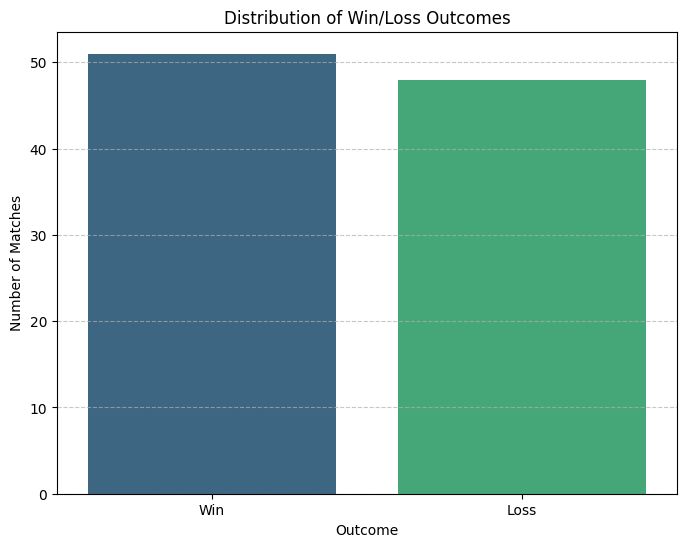

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns:
    # Calculate the count of wins and losses
    win_counts = df['win'].value_counts().reset_index()
    win_counts.columns = ['Win_Status', 'Count']

    # Map 1 to 'Win' and 0 to 'Loss' for better readability
    win_counts['Win_Status'] = win_counts['Win_Status'].map({1: 'Win', 0: 'Loss'})

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Win_Status', y='Count', data=win_counts, hue='Win_Status', palette='viridis', legend=False)
    plt.title('Distribution of Win/Loss Outcomes')
    plt.xlabel('Outcome')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'win' column. Please specify which column indicates the win status.")

In [9]:
if 'duration' in df.columns:
    average_duration_seconds = df['duration'].mean()
    # Convert duration from seconds to minutes for better readability
    average_duration_minutes = average_duration_seconds / 60
    print(f"The average match duration is: {average_duration_minutes:.2f} minutes ({average_duration_seconds:.0f} seconds)")
else:
    print("Could not find a 'duration' column. Please specify which column indicates match duration.")

The average match duration is: 42.60 minutes (2556 seconds)


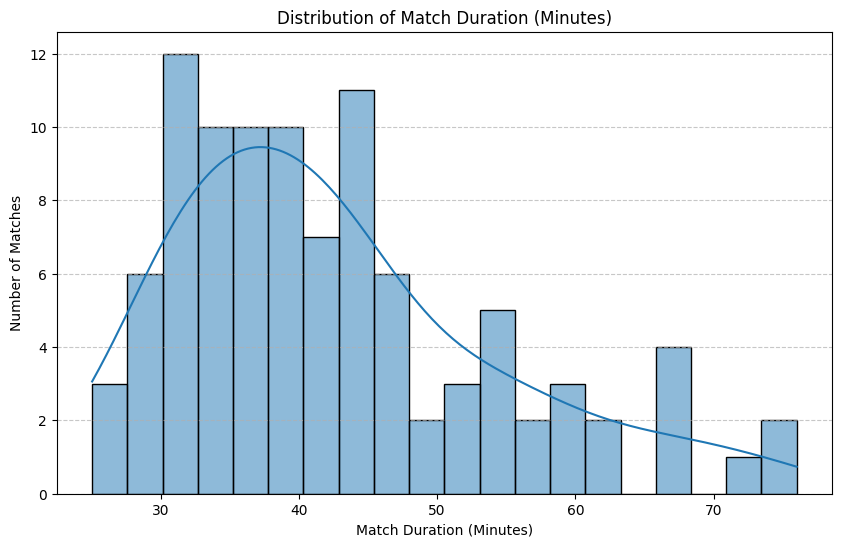

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'duration' in df.columns:
    # Convert duration from seconds to minutes for plotting
    df['duration_minutes'] = df['duration'] / 60

    plt.figure(figsize=(10, 6))
    sns.histplot(df['duration_minutes'], bins=20, kde=True)
    plt.title('Distribution of Match Duration (Minutes)')
    plt.xlabel('Match Duration (Minutes)')
    plt.ylabel('Number of Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'duration' column to plot. Please specify which column indicates match duration.")

In [11]:
import numpy as np

# Ensure 'Kills', 'Assists', and 'Deaths' columns exist
required_columns = ['kills', 'assists', 'deaths', 'match_id', 'player_slot']

if all(col in df.columns for col in required_columns):
    # Calculate KDA Ratio per player. Handle division by zero for 'deaths'.
    # Replace 0 deaths with 1 to avoid infinity, as per common practice for KDA.
    df['deaths_safe'] = df['deaths'].replace(0, 1)
    df['calculated_kda_ratio'] = (df['kills'] + df['assists']) / df['deaths_safe']

    # Create a new DataFrame with the calculated KDA per player per match
    kda_per_match_df = df[['match_id', 'player_slot', 'calculated_kda_ratio']].copy()

    print("KDA per player per match DataFrame created:")
    display(kda_per_match_df.head(10))
else:
    missing_cols = [col for col in required_columns if col not in df.columns]
    print(f"Missing required columns to calculate KDA: {missing_cols}. Please ensure 'kills', 'assists', and 'deaths' columns are available.")

KDA per player per match DataFrame created:


,match_id,player_slot,calculated_kda_ratio
0,8660412202,2,3.000000
1,8660387354,1,1.266667
2,8659172466,3,1.900000
3,8659142743,131,1.411765
4,8657961379,3,1.291667
5,8657926118,0,2.769231
6,8656697856,0,2.285714
7,8653893230,131,2.600000
8,8679428811,131,2.571429
9,8676947936,131,1.166667


In [12]:
if 'calculated_kda_ratio' in kda_per_match_df.columns:
    print("Descriptive Statistics for Calculated KDA Ratio:")
    display(kda_per_match_df['calculated_kda_ratio'].describe())
else:
    print("Could not find 'calculated_kda_ratio' in kda_per_match_df.")

Descriptive Statistics for Calculated KDA Ratio:


count    99.000000
mean      3.353147
std       2.247879
min       0.750000
25%       1.919872
50%       2.666667
75%       4.200000
max      12.666667
Name: calculated_kda_ratio, dtype: float64

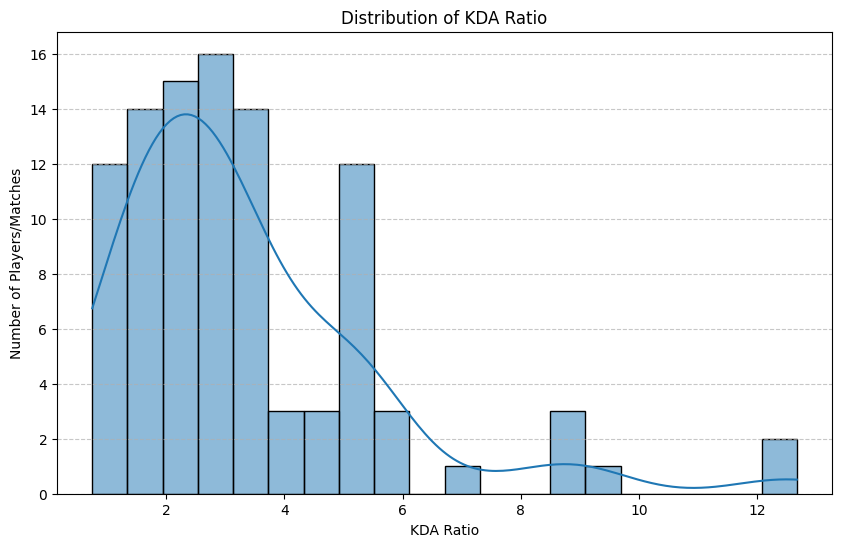

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in kda_per_match_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(kda_per_match_df['calculated_kda_ratio'], bins=20, kde=True)
    plt.title('Distribution of KDA Ratio')
    plt.xlabel('KDA Ratio')
    plt.ylabel('Number of Players/Matches')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find 'calculated_kda_ratio' in kda_per_match_df to plot. Please ensure the KDA ratio has been calculated.")

In [14]:
if 'gold_per_min' in df.columns:
    # Calculate descriptive statistics for Gold per Minute (GPM)
    gpm_stats = df['gold_per_min'].describe()
    print("Descriptive Statistics for Gold per Minute (GPM):")
    display(gpm_stats)
else:
    print("Could not find a 'gold_per_min' column. Please ensure the column name is correct.")

Descriptive Statistics for Gold per Minute (GPM):


count     99.000000
mean     499.090909
std      150.396285
min      234.000000
25%      368.000000
50%      480.000000
75%      610.500000
max      896.000000
Name: gold_per_min, dtype: float64

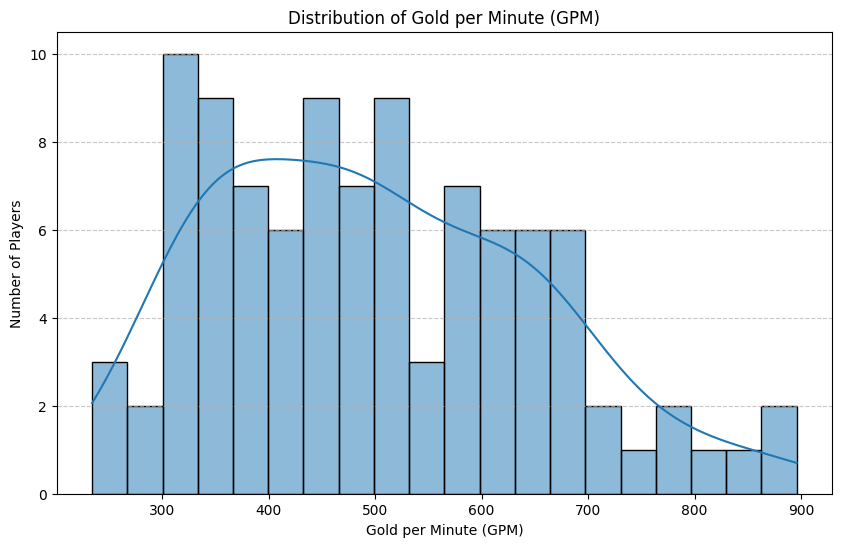

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'gold_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['gold_per_min'], bins=20, kde=True)
    plt.title('Distribution of Gold per Minute (GPM)')
    plt.xlabel('Gold per Minute (GPM)')
    plt.ylabel('Number of Players')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find a 'gold_per_min' column to plot. Please ensure the column name is correct.")

In [16]:
if 'xp_per_min' in df.columns:
    # Calculate descriptive statistics for Experience per Minute (XPM)
    xpm_stats = df['xp_per_min'].describe()
    print("Descriptive Statistics for Experience per Minute (XPM):")
    display(xpm_stats)
else:
    print("Could not find an 'xp_per_min' column. Please ensure the column name is correct.")

Descriptive Statistics for Experience per Minute (XPM):


count      99.000000
mean      714.000000
std       221.510031
min       312.000000
25%       533.500000
50%       673.000000
75%       918.000000
max      1263.000000
Name: xp_per_min, dtype: float64

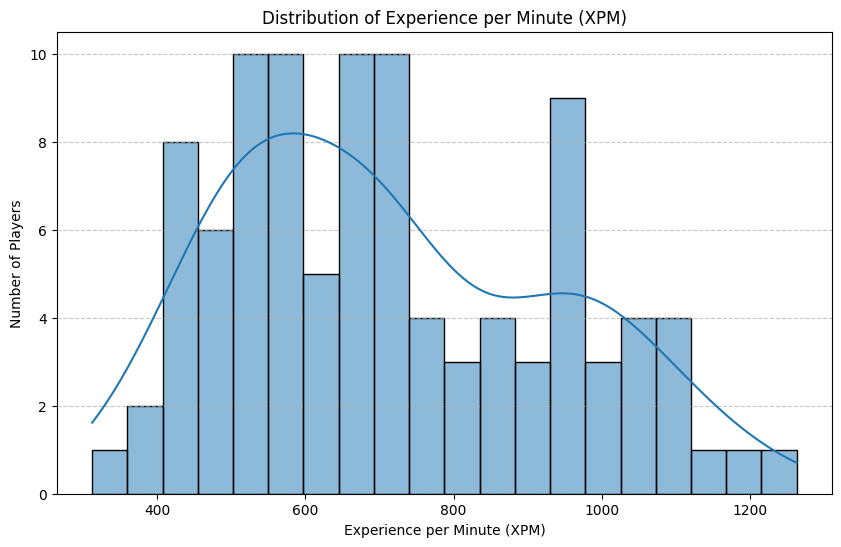

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'xp_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['xp_per_min'], bins=20, kde=True)
    plt.title('Distribution of Experience per Minute (XPM)')
    plt.xlabel('Experience per Minute (XPM)')
    plt.ylabel('Number of Players')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Could not find an 'xp_per_min' column to plot. Please ensure the column name is correct.")

In [18]:
if 'start_time' in df.columns:
    df['start_time'] = pd.to_datetime(df['start_time'], unit='s') # Assuming start_time is in Unix timestamp (seconds)
    print(f"'start_time' column successfully converted to datetime. New dtype: {df['start_time'].dtype}")
    display(df[['start_time']].head())
else:
    print("Could not find a 'start_time' column. Please ensure the column name is correct.")

'start_time' column successfully converted to datetime. New dtype: datetime64[ns]


,start_time
0,2026-01-23 04:58:48
1,2026-01-23 04:14:58
2,2026-01-22 04:50:58
3,2026-01-22 03:56:48
4,2026-01-21 05:32:46


In [19]:
if 'start_time' in df.columns:
    # Ensure 'start_time' is datetime (already converted in a previous step)
    # Create a 'match_week' column by extracting the week from 'start_time'
    df['match_week'] = df['start_time'].dt.to_period('W')

    # Group by 'match_week' and count unique matches per week
    matches_by_week = df.groupby('match_week')['match_id'].nunique().sort_index()

    print("Matches grouped by week (chronological order):")
    display(matches_by_week)

    # Optional: Display a few matches for each week for verification
    # print("\nFirst match_id for each week:")
    # display(df.groupby('match_week')['match_id'].first().sort_index().reset_index())

else:
    print("Could not find a 'start_time' column. Please ensure the column name is correct and it's converted to datetime.")

Matches grouped by week (chronological order):


match_week
2025-11-10/2025-11-16     1
2025-11-17/2025-11-23    10
2025-11-24/2025-11-30     8
2025-12-01/2025-12-07     4
2025-12-08/2025-12-14    10
2025-12-15/2025-12-21     9
2025-12-22/2025-12-28    13
2025-12-29/2026-01-04     3
2026-01-05/2026-01-11     7
2026-01-12/2026-01-18    10
2026-01-19/2026-01-25     8
2026-01-26/2026-02-01     7
2026-02-02/2026-02-08     9
Freq: W-SUN, Name: match_id, dtype: int64

In [20]:
if 'match_week' in df.columns and 'calculated_kda_ratio' in df.columns and 'gold_per_min' in df.columns and 'xp_per_min' in df.columns and 'win' in df.columns:
    # Group by match_week and calculate averages
    weekly_averages = df.groupby('match_week').agg(
        weekly_kda_avg=('calculated_kda_ratio', 'mean'),
        weekly_gpm_avg=('gold_per_min', 'mean'),
        weekly_xpm_avg=('xp_per_min', 'mean'),
        weekly_win_rate=('win', lambda x: x.mean() * 100) # Calculate win rate as percentage
    ).sort_index()

    print("Weekly Averages for KDA, GPM, XPM, and Win Rate:")
    display(weekly_averages)
else:
    missing_cols = []
    if 'match_week' not in df.columns: missing_cols.append('match_week')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    if 'win' not in df.columns: missing_cols.append('win')
    print(f"Could not find required columns for weekly average calculation: {', '.join(missing_cols)}. Please ensure they are created.")

Weekly Averages for KDA, GPM, XPM, and Win Rate:


,weekly_kda_avg,weekly_gpm_avg,weekly_xpm_avg,weekly_win_rate
match_week,,,,
2025-11-10/2025-11-16,3.181818,834.000000,1102.000000,0.000000
2025-11-17/2025-11-23,2.782515,544.900000,786.000000,30.000000
2025-11-24/2025-11-30,2.966574,438.125000,604.500000,50.000000
2025-12-01/2025-12-07,7.770833,657.750000,935.250000,75.000000
2025-12-08/2025-12-14,3.926190,616.200000,816.300000,60.000000
2025-12-15/2025-12-21,2.328853,389.111111,554.000000,22.222222
2025-12-22/2025-12-28,4.732184,427.769231,697.461538,84.615385
2025-12-29/2026-01-04,3.347222,478.000000,732.333333,33.333333
2026-01-05/2026-01-11,3.347145,468.000000,657.285714,85.714286


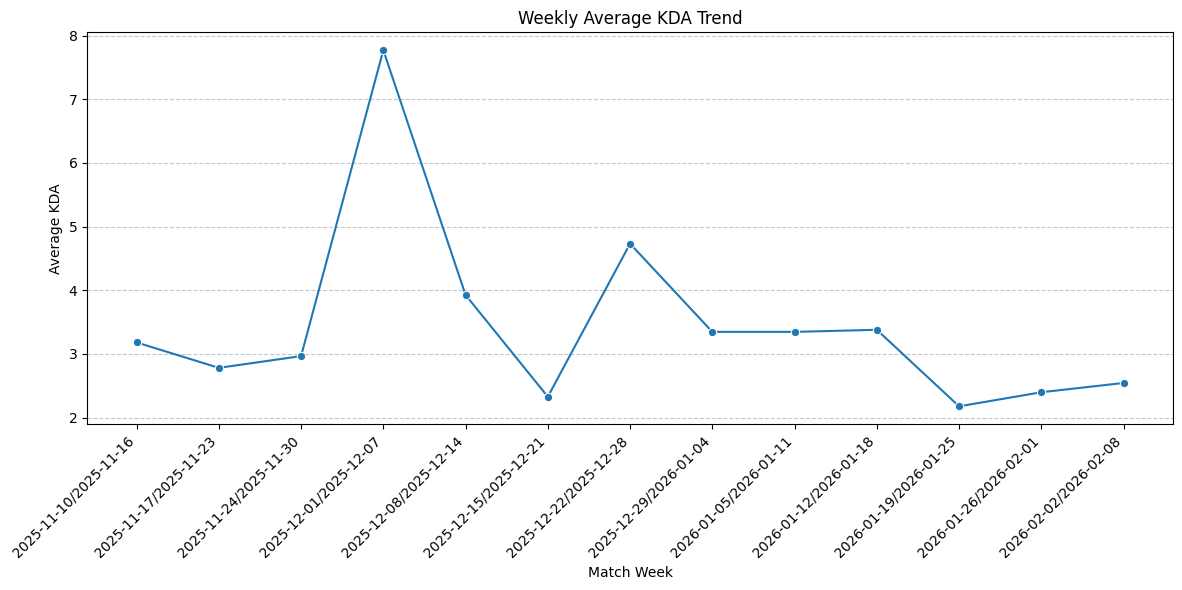

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_kda_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_kda_avg', data=weekly_averages, marker='o')
    plt.title('Weekly Average KDA Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average KDA')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_kda_avg' in the weekly_averages DataFrame.")

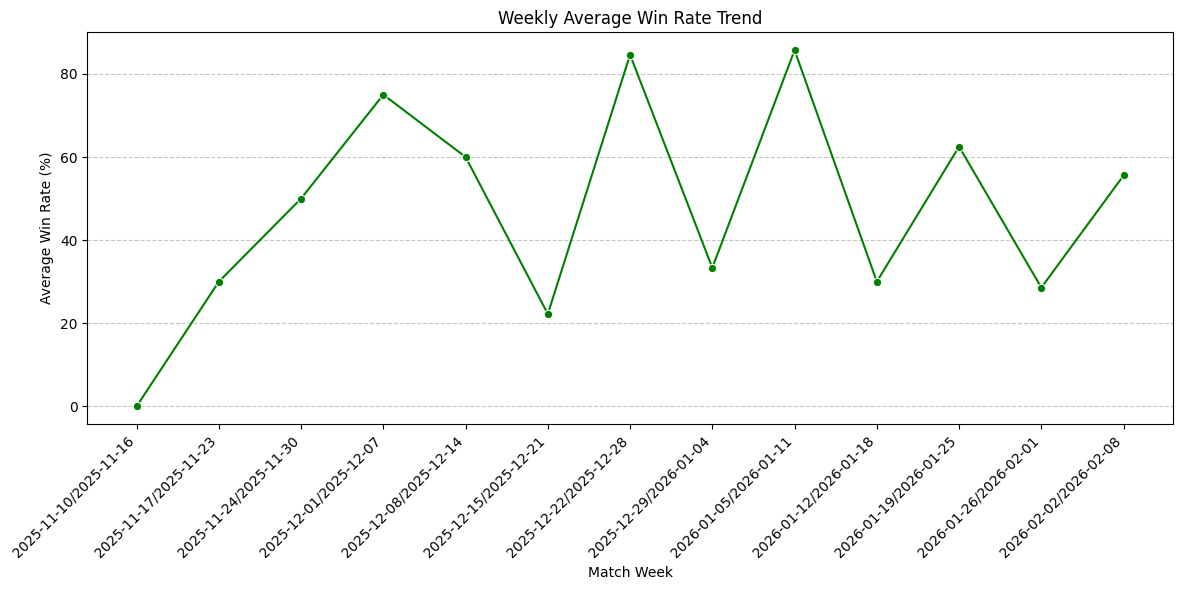

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_win_rate' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_win_rate', data=weekly_averages, marker='o', color='green')
    plt.title('Weekly Average Win Rate Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average Win Rate (%)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_win_rate' in the weekly_averages DataFrame.")

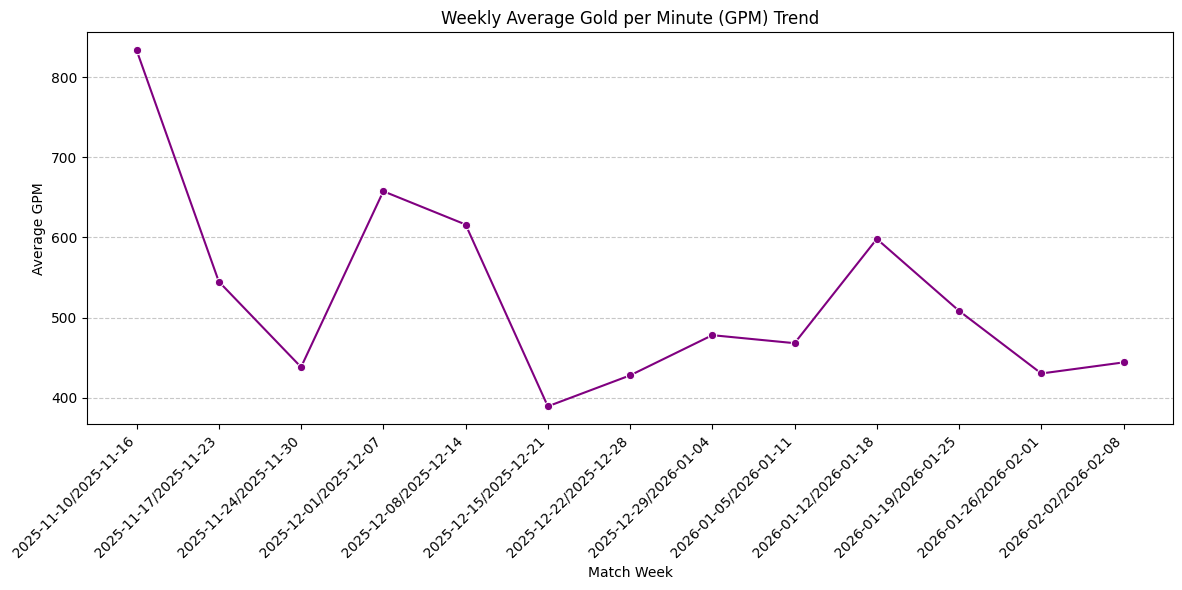

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_gpm_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_gpm_avg', data=weekly_averages, marker='o', color='purple')
    plt.title('Weekly Average Gold per Minute (GPM) Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average GPM')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_gpm_avg' in the weekly_averages DataFrame.")

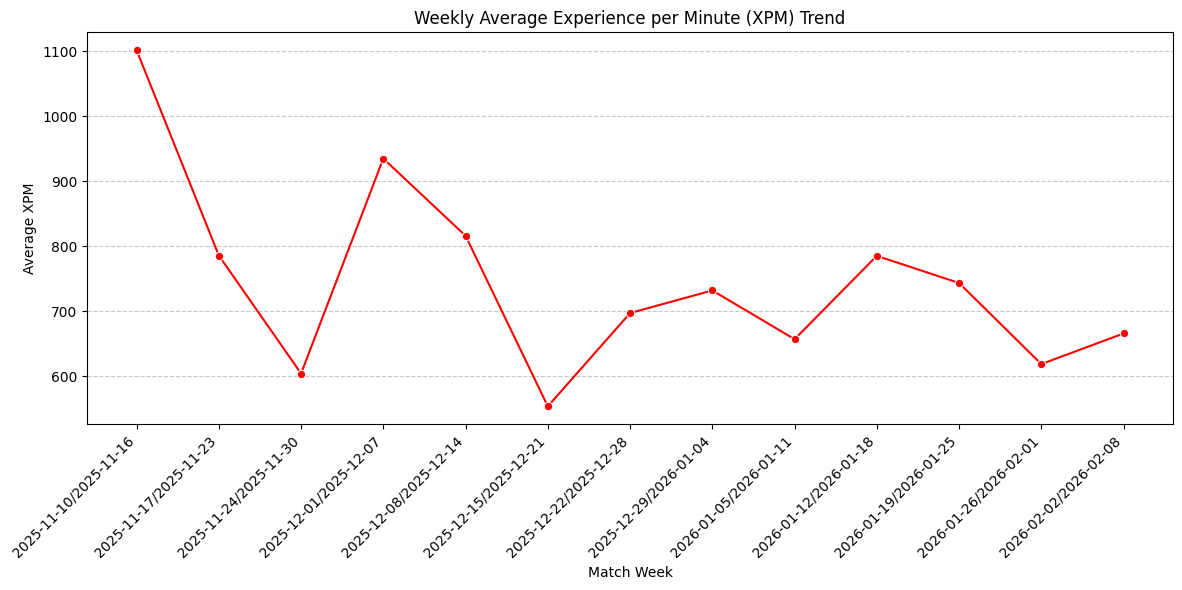

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'weekly_xpm_avg' in weekly_averages.columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=weekly_averages.index.astype(str), y='weekly_xpm_avg', data=weekly_averages, marker='o', color='red')
    plt.title('Weekly Average Experience per Minute (XPM) Trend')
    plt.xlabel('Match Week')
    plt.ylabel('Average XPM')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'weekly_xpm_avg' in the weekly_averages DataFrame.")

In [25]:
if 'win' in df.columns and 'calculated_kda_ratio' in df.columns:
    mean_kda_by_win_status = df.groupby('win')['calculated_kda_ratio'].mean().reset_index()
    mean_kda_by_win_status['win_status_label'] = mean_kda_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean KDA Ratio grouped by Win Status:")
    display(mean_kda_by_win_status[['win_status_label', 'calculated_kda_ratio']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean KDA Ratio grouped by Win Status:


,win_status_label,calculated_kda_ratio
0,Loss,2.053981
1,Win,4.575892


In [26]:
if 'win' in df.columns and 'gold_per_min' in df.columns:
    mean_gpm_by_win_status = df.groupby('win')['gold_per_min'].mean().reset_index()
    mean_gpm_by_win_status['win_status_label'] = mean_gpm_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean Gold per Minute (GPM) grouped by Win Status:")
    display(mean_gpm_by_win_status[['win_status_label', 'gold_per_min']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean Gold per Minute (GPM) grouped by Win Status:


,win_status_label,gold_per_min
0,Loss,455.979167
1,Win,539.666667


In [27]:
if 'win' in df.columns and 'xp_per_min' in df.columns:
    mean_xpm_by_win_status = df.groupby('win')['xp_per_min'].mean().reset_index()
    mean_xpm_by_win_status['win_status_label'] = mean_xpm_by_win_status['win'].map({1: 'Win', 0: 'Loss'})

    print("Mean Experience per Minute (XPM) grouped by Win Status:")
    display(mean_xpm_by_win_status[['win_status_label', 'xp_per_min']])
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Mean Experience per Minute (XPM) grouped by Win Status:


,win_status_label,xp_per_min
0,Loss,654.562500
1,Win,769.941176


In [29]:
from scipy import stats
import numpy as np

# Ensure 'win' column exists and is numeric (0/1)
if 'win' not in df.columns:
    print("Error: 'win' column not found in DataFrame.")
else:
    # Separate data into win and loss groups
    win_group = df[df['win'] == 1]
    loss_group = df[df['win'] == 0]

    metrics_to_test = ['calculated_kda_ratio', 'gold_per_min', 'xp_per_min']

    print("### Independent Samples t-test (Win vs. Loss Groups) ###\n")

    for metric in metrics_to_test:
        if metric not in df.columns:
            print(f"Skipping t-test for '{metric}' as the column was not found.")
            continue

        # Extract data for the current metric for both groups
        data_win = win_group[metric]
        data_loss = loss_group[metric]

        # Perform independent samples t-test
        t_statistic, p_value = stats.ttest_ind(data_win, data_loss, equal_var=False) # Assuming unequal variances

        # Calculate Cohen's d effect size
        # Means and Standard Deviations
        mean_win = data_win.mean()
        mean_loss = data_loss.mean()
        std_win = data_win.std()
        std_loss = data_loss.std()
        n_win = len(data_win)
        n_loss = len(data_loss)

        # Pooled standard deviation
        if (n_win + n_loss - 2) > 0:
            s_pooled = np.sqrt(((n_win - 1) * std_win**2 + (n_loss - 1) * std_loss**2) / (n_win + n_loss - 2))
            if s_pooled > 0:
                cohens_d = (mean_win - mean_loss) / s_pooled
            else:
                cohens_d = np.nan # Avoid division by zero if std_pooled is zero
        else:
            cohens_d = np.nan # Not enough data to calculate pooled std


        print(f"--- {metric.replace('_', ' ').title()} ---")
        print(f"T-statistic: {t_statistic:.3f}")
        print(f"P-value: {p_value:.3f}")
        print(f"Cohen's d: {cohens_d:.3f}")

        alpha = 0.05 # Significance level
        if p_value < alpha:
            print(f"Conclusion: There is a statistically significant difference in {metric.replace('_', ' ').title()} between winning and losing matches (p < {alpha}).")
        else:
            print(f"Conclusion: There is no statistically significant difference in {metric.replace('_', ' ').title()} between winning and losing matches (p >= {alpha}).")
        print("\n")

### Independent Samples t-test (Win vs. Loss Groups) ###

--- Calculated Kda Ratio ---
T-statistic: 6.892
P-value: 0.000
Cohen's d: 1.351
Conclusion: There is a statistically significant difference in Calculated Kda Ratio between winning and losing matches (p < 0.05).


--- Gold Per Min ---
T-statistic: 2.869
P-value: 0.005
Cohen's d: 0.577
Conclusion: There is a statistically significant difference in Gold Per Min between winning and losing matches (p < 0.05).


--- Xp Per Min ---
T-statistic: 2.672
P-value: 0.009
Cohen's d: 0.537
Conclusion: There is a statistically significant difference in Xp Per Min between winning and losing matches (p < 0.05).




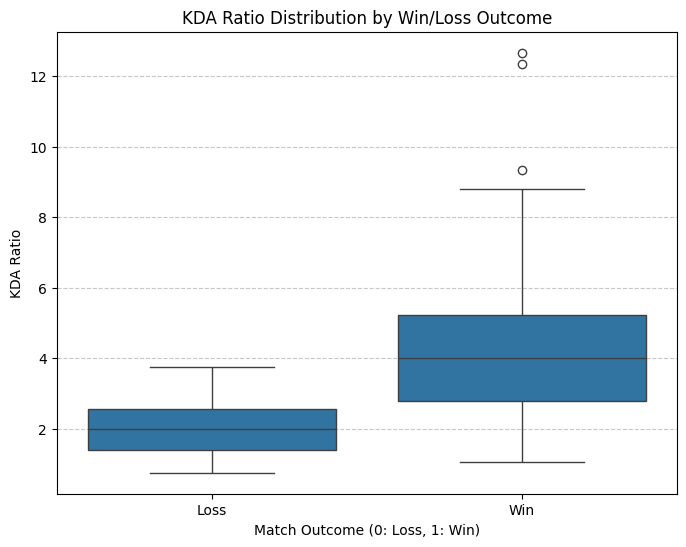

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'calculated_kda_ratio' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='calculated_kda_ratio', data=df)
    plt.title('KDA Ratio Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('KDA Ratio')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

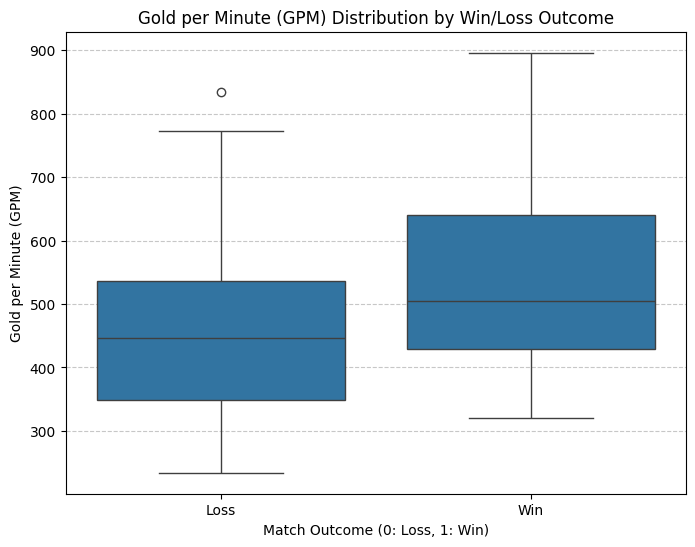

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'gold_per_min' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='gold_per_min', data=df)
    plt.title('Gold per Minute (GPM) Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('Gold per Minute (GPM)')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

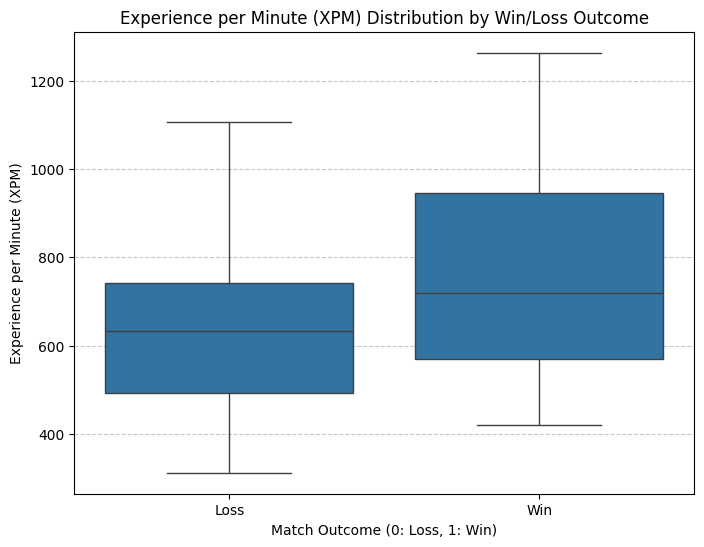

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'win' in df.columns and 'xp_per_min' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='win', y='xp_per_min', data=df)
    plt.title('Experience per Minute (XPM) Distribution by Win/Loss Outcome')
    plt.xlabel('Match Outcome (0: Loss, 1: Win)')
    plt.ylabel('Experience per Minute (XPM)')
    plt.xticks(ticks=[0, 1], labels=['Loss', 'Win'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    missing_cols = []
    if 'win' not in df.columns: missing_cols.append('win')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

In [33]:
if 'hero_id' in df.columns:
    hero_usage_frequency = df['hero_id'].value_counts().reset_index()
    hero_usage_frequency.columns = ['Hero ID', 'Usage Count']
    print("Frequency of hero usage:")
    display(hero_usage_frequency)
else:
    print("Could not find a 'hero_id' column. Please specify which column identifies heroes.")

Frequency of hero usage:


,Hero ID,Usage Count
0,100,15
1,104,12
2,14,5
3,71,5
4,1,5
5,41,5
6,8,5
7,35,4
8,7,4
9,48,3


In [34]:
if 'hero_id' in df.columns and 'hero_name' in df.columns:
    # Calculate hero usage frequency
    hero_usage_frequency = df['hero_id'].value_counts().reset_index()
    hero_usage_frequency.columns = ['hero_id', 'Usage Count']

    # Get unique hero_id and hero_name pairs from the original DataFrame
    hero_names_map = df[['hero_id', 'hero_name']].drop_duplicates().set_index('hero_id')

    # Merge the frequency with the hero names
    hero_usage_with_names = hero_usage_frequency.set_index('hero_id').join(hero_names_map).reset_index()
    hero_usage_with_names = hero_usage_with_names[['hero_id', 'hero_name', 'Usage Count']]

    print("Frequency of hero usage with names:")
    display(hero_usage_with_names)
else:
    print("Could not find 'hero_id' or 'hero_name' columns. Please ensure they are available.")

Frequency of hero usage with names:


,hero_id,hero_name,Usage Count
0,100,Tusk,15
1,104,Legion Commander,12
2,14,Pudge,5
3,71,Spirit Breaker,5
4,1,Anti-Mage,5
5,41,Faceless Void,5
6,8,Juggernaut,5
7,35,Sniper,4
8,7,Earthshaker,4
9,48,Luna,3


In [35]:
if 'hero_id' in df.columns and 'hero_name' in df.columns and 'win' in df.columns:
    # Group by hero_id and hero_name to calculate win rate
    hero_win_rates = df.groupby(['hero_id', 'hero_name'])['win'].mean().reset_index()
    hero_win_rates['win_rate_percentage'] = hero_win_rates['win'] * 100

    # Sort by win rate for better insights
    hero_win_rates_sorted = hero_win_rates.sort_values(by='win_rate_percentage', ascending=False)

    print("Win Rate per Hero (including hero name):")
    display(hero_win_rates_sorted[['hero_name', 'win_rate_percentage']])
else:
    missing_cols = []
    if 'hero_id' not in df.columns: missing_cols.append('hero_id')
    if 'hero_name' not in df.columns: missing_cols.append('hero_name')
    if 'win' not in df.columns: missing_cols.append('win')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Win Rate per Hero (including hero name):


,hero_name,win_rate_percentage
4,Shadow Fiend,100.000000
36,Mars,100.000000
15,Venomancer,100.000000
10,Lion,100.000000
7,Sven,100.000000
25,Chaos Knight,100.000000
26,Ogre Magi,100.000000
28,Nyx Assassin,100.000000
21,Bounty Hunter,100.000000
23,Spirit Breaker,80.000000


In [36]:
if 'hero_id' in df.columns and 'hero_name' in df.columns and 'calculated_kda_ratio' in df.columns:
    # Group by hero_id and hero_name to calculate average KDA
    hero_average_kda = df.groupby(['hero_id', 'hero_name'])['calculated_kda_ratio'].mean().reset_index()

    # Sort by average KDA for better insights
    hero_average_kda_sorted = hero_average_kda.sort_values(by='calculated_kda_ratio', ascending=False)

    print("Average KDA per Hero (including hero name):")
    display(hero_average_kda_sorted[['hero_name', 'calculated_kda_ratio']])
else:
    missing_cols = []
    if 'hero_id' not in df.columns: missing_cols.append('hero_id')
    if 'hero_name' not in df.columns: missing_cols.append('hero_name')
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    print(f"Could not find required columns for this calculation: {', '.join(missing_cols)}. Please ensure they are available.")

Average KDA per Hero (including hero name):


,hero_name,calculated_kda_ratio
26,Ogre Magi,9.333333
13,Sniper,6.076389
7,Sven,4.666667
3,Juggernaut,4.361765
23,Spirit Breaker,4.223016
18,Luna,4.133333
33,Legion Commander,4.012828
0,Anti-Mage,3.798983
10,Lion,3.791667
4,Shadow Fiend,3.750000


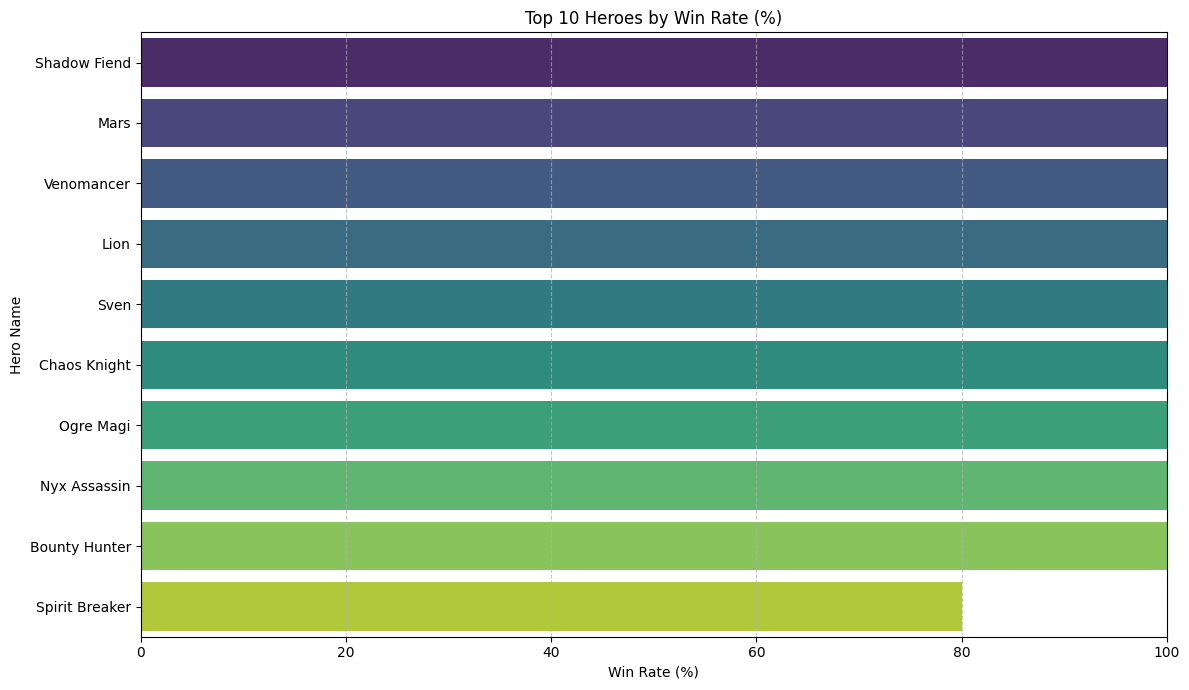

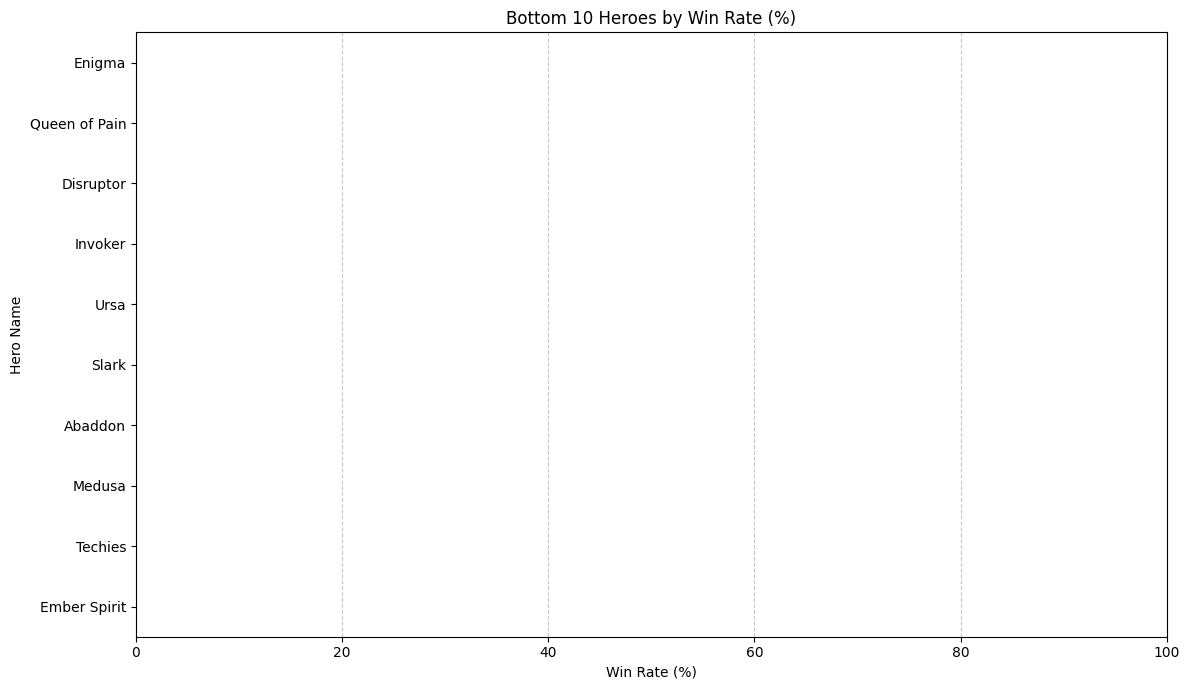

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'hero_name' in hero_win_rates_sorted.columns and 'win_rate_percentage' in hero_win_rates_sorted.columns:
    # Get top 10 heroes by win rate
    top_10_heroes = hero_win_rates_sorted.head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='win_rate_percentage', y='hero_name', data=top_10_heroes, hue='hero_name', palette='viridis', legend=False)
    plt.title('Top 10 Heroes by Win Rate (%)')
    plt.xlabel('Win Rate (%)')
    plt.ylabel('Hero Name')
    plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Get bottom 10 heroes by win rate
    bottom_10_heroes = hero_win_rates_sorted.tail(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='win_rate_percentage', y='hero_name', data=bottom_10_heroes, hue='hero_name', palette='plasma', legend=False)
    plt.title('Bottom 10 Heroes by Win Rate (%)')
    plt.xlabel('Win Rate (%)')
    plt.ylabel('Hero Name')
    plt.xlim(0, 100) # Ensure x-axis goes from 0 to 100
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'hero_name' or 'win_rate_percentage' in the hero_win_rates_sorted DataFrame.")

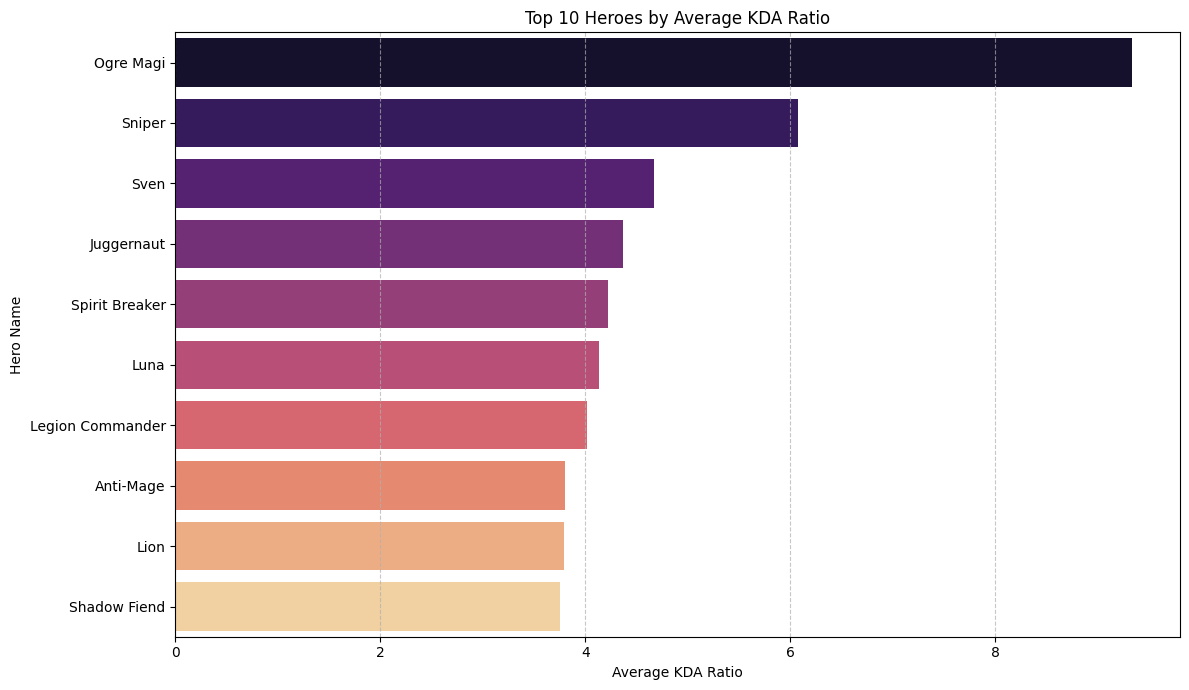

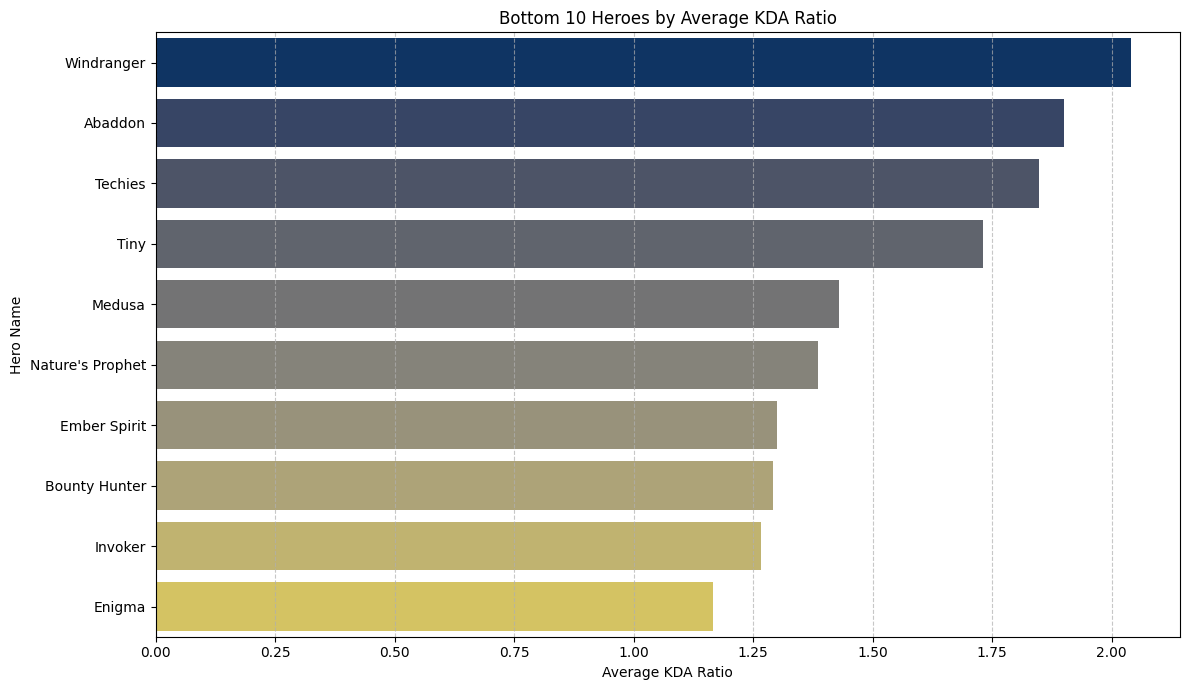

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'hero_name' in hero_average_kda_sorted.columns and 'calculated_kda_ratio' in hero_average_kda_sorted.columns:
    # Get top 10 heroes by average KDA
    top_10_kda_heroes = hero_average_kda_sorted.head(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='calculated_kda_ratio', y='hero_name', data=top_10_kda_heroes, hue='hero_name', palette='magma', legend=False)
    plt.title('Top 10 Heroes by Average KDA Ratio')
    plt.xlabel('Average KDA Ratio')
    plt.ylabel('Hero Name')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Get bottom 10 heroes by average KDA
    bottom_10_kda_heroes = hero_average_kda_sorted.tail(10)

    plt.figure(figsize=(12, 7))
    sns.barplot(x='calculated_kda_ratio', y='hero_name', data=bottom_10_kda_heroes, hue='hero_name', palette='cividis', legend=False)
    plt.title('Bottom 10 Heroes by Average KDA Ratio')
    plt.xlabel('Average KDA Ratio')
    plt.ylabel('Hero Name')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Could not find 'hero_name' or 'calculated_kda_ratio' in the hero_average_kda_sorted DataFrame.")

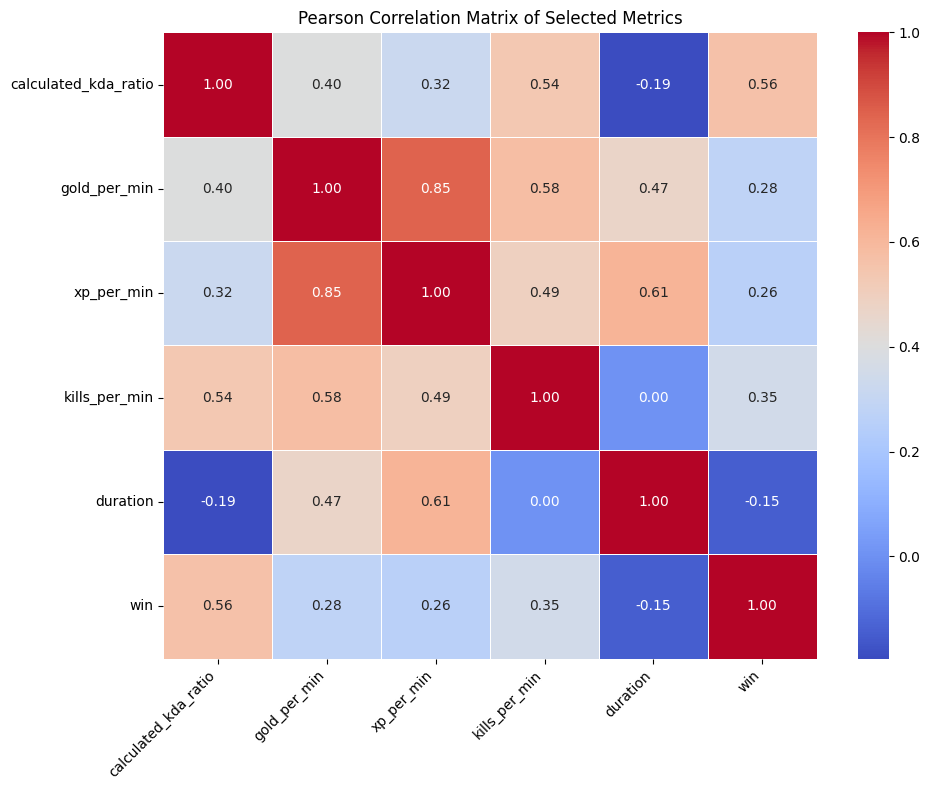

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the specific columns requested by the user for correlation analysis
selected_correlation_cols = [
    'calculated_kda_ratio',
    'gold_per_min',
    'xp_per_min',
    'kills_per_min',
    'duration',
    'win'
]

# Filter out columns that might not exist in the DataFrame
existing_correlation_cols = [col for col in selected_correlation_cols if col in df.columns]

if len(existing_correlation_cols) > 1:
    correlation_matrix = df[existing_correlation_cols].corr(method='pearson')

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Pearson Correlation Matrix of Selected Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print(f"Not enough existing numerical columns to compute a meaningful correlation matrix from the requested list: {selected_correlation_cols}.")

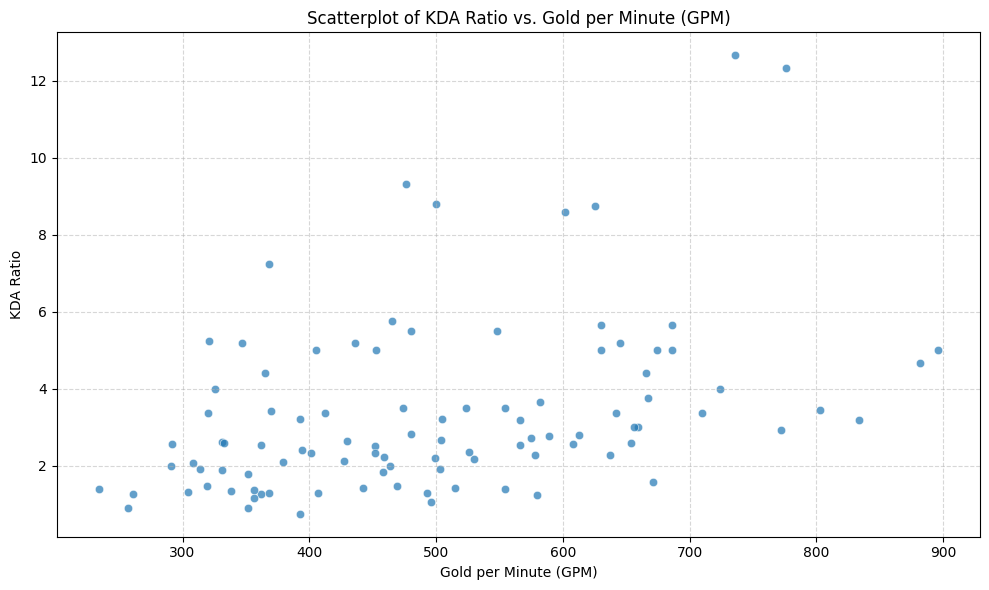

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in df.columns and 'gold_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='gold_per_min', y='calculated_kda_ratio', data=df, alpha=0.7)
    plt.title('Scatterplot of KDA Ratio vs. Gold per Minute (GPM)')
    plt.xlabel('Gold per Minute (GPM)')
    plt.ylabel('KDA Ratio')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    missing_cols = []
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'gold_per_min' not in df.columns: missing_cols.append('gold_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

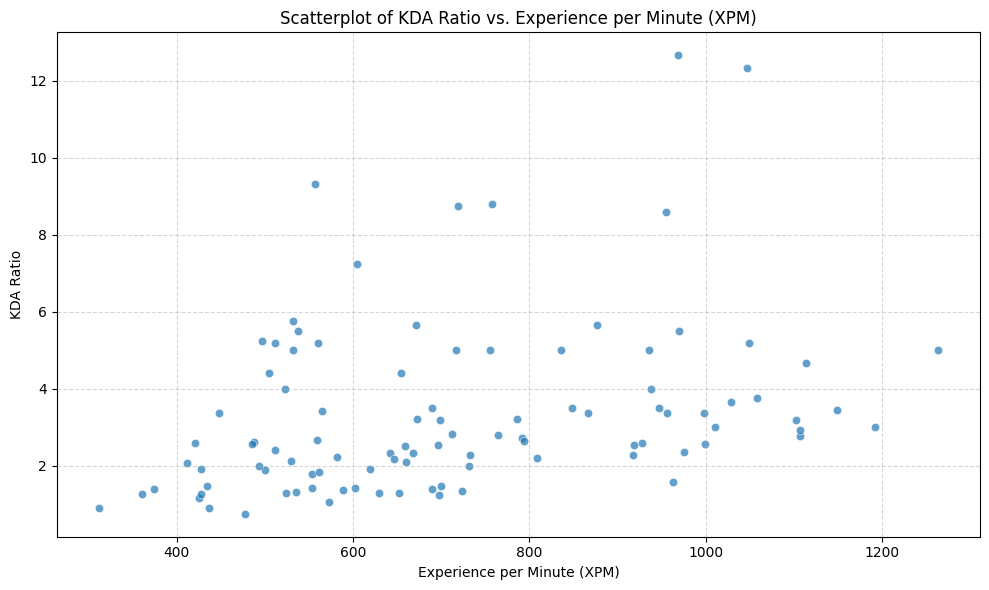

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'calculated_kda_ratio' in df.columns and 'xp_per_min' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='xp_per_min', y='calculated_kda_ratio', data=df, alpha=0.7)
    plt.title('Scatterplot of KDA Ratio vs. Experience per Minute (XPM)')
    plt.xlabel('Experience per Minute (XPM)')
    plt.ylabel('KDA Ratio')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    missing_cols = []
    if 'calculated_kda_ratio' not in df.columns: missing_cols.append('calculated_kda_ratio')
    if 'xp_per_min' not in df.columns: missing_cols.append('xp_per_min')
    print(f"Could not find required columns for this plot: {', '.join(missing_cols)}.")

In [42]:
import pandas as pd

# Ensure weekly_averages DataFrame exists and has the required columns
required_weekly_cols = ['weekly_kda_avg', 'weekly_gpm_avg', 'weekly_xpm_avg']

if all(col in weekly_averages.columns for col in required_weekly_cols):
    consistency_metrics = pd.DataFrame(index=['Standard Deviation (SD)', 'Coefficient of Variation (CV)'])

    for metric_col in required_weekly_cols:
        # Calculate Standard Deviation (SD)
        sd_value = weekly_averages[metric_col].std()

        # Calculate Mean (already computed as avg in weekly_averages for KDA, GPM, XPM)
        mean_value = weekly_averages[metric_col].mean()

        # Calculate Coefficient of Variation (CV = SD / Mean)
        cv_value = (sd_value / mean_value) * 100 if mean_value != 0 else 0 # Express as percentage

        consistency_metrics[metric_col.replace('weekly_', '').replace('_avg', '').upper()] = [sd_value, cv_value]

    print("Consistency Metrics (SD and CV) Across Weeks:")
    display(consistency_metrics.round(2))

    print("\n--- Variability Comparison ---")
    print("Higher Coefficient of Variation indicates greater variability.")
    print("Comparing the CV values:")
    max_cv_metric = consistency_metrics.loc['Coefficient of Variation (CV)'].idxmax()
    min_cv_metric = consistency_metrics.loc['Coefficient of Variation (CV)'].idxmin()
    print(f"  - {max_cv_metric} shows the highest weekly variability (CV = {consistency_metrics.loc['Coefficient of Variation (CV)', max_cv_metric]:.2f}%).")
    print(f"  - {min_cv_metric} shows the lowest weekly variability (CV = {consistency_metrics.loc['Coefficient of Variation (CV)', min_cv_metric]:.2f}%).")

else:
    print(f"Could not find required columns in `weekly_averages` for consistency metrics: {', '.join(required_weekly_cols)}. Please ensure weekly averages are computed.")

Consistency Metrics (SD and CV) Across Weeks:


,KDA,GPM,XPM
Standard Deviation (SD),1.48,123.80,147.33
Coefficient of Variation (CV),42.73,23.55,19.75



--- Variability Comparison ---
Higher Coefficient of Variation indicates greater variability.
Comparing the CV values:
  - KDA shows the highest weekly variability (CV = 42.73%).
  - XPM shows the lowest weekly variability (CV = 19.75%).
